# Lab 4: Functions and Visualizations

Welcome to Lab 4! This week, we'll learn about functions, table methods such as `apply`, and how to generate visualizations! 

Recommended Reading:

* [Applying a Function to a Column](https://www.inferentialthinking.com/chapters/08/1/applying-a-function-to-a-column.html)
* [Visualizations](https://www.inferentialthinking.com/chapters/07/visualization.html)

First, set up the notebook by running the cell below.

In [1]:
import numpy as np
from datascience import *

# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from client.api.notebook import Notebook
ok = Notebook('lab04.ok')
_ = ok.submit()

Assignment: Functions and Visualizations
OK, version v1.12.5



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab04.ipynb'.
Performing authentication
Please enter your bCourses email.


KeyboardInterrupt: 

**Deadline**: If you are not attending lab physically, you have to complete this lab and submit by Wednesday, February 13th before 8:59 A.M. in order to receive lab credit. Otherwise, please attend the lab you are enrolled in, get checked off with your (u)GSI or learning assistant **AND** submit this assignment by the end of the lab section (with whatever progress you've made) to receive lab credit.

**Submission**: Once you're finished, select "Save and Checkpoint" in the File menu and then execute the submit cell at the end. The result will contain a link that you can use to check that your assignment has been submitted successfully. 

## 1. Functions and CEO Incomes

In this question, we'll look at the 2015 compensation of CEOs at the 100 largest companies in California. The data was compiled from a [Los Angeles Times analysis](http://spreadsheets.latimes.com/california-ceo-compensation/), and ultimately came from [filings](https://www.sec.gov/answers/proxyhtf.htm) mandated by the SEC from all publicly-traded companies. Two companies have two CEOs, so there are 102 CEOs in the dataset.

We've copied the raw data from the LA Times page into a file called `raw_compensation.csv`. (The page notes that all dollar amounts are in **millions of dollars**.)

In [2]:
raw_compensation = Table.read_table('raw_compensation.csv')
raw_compensation

Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay
1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362
2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338
6,John H. Hammergren,McKesson (San Francisco),$24.84,-4%,$12.10,$12.37,$0.37,222
7,John S. Watson,Chevron (San Ramon),$22.04,-15%,$4.31,$14.68,$3.05,183
8,Jeffrey Weiner,LinkedIn (Mountain View),$19.86,27%,$2.47,$17.26,$0.13,182
9,John T. Chambers**,Cisco Systems (San Jose),$19.62,19%,$5.10,$14.51,$0.01,170
10,John G. Stumpf,Wells Fargo (San Francisco),$19.32,-10%,$6.80,$12.50,$0.02,256


We want to compute the average of the CEOs' pay. Try running the cell below.

In [3]:
np.average(raw_compensation.column("Total Pay"))

TypeError: cannot perform reduce with flexible type

You should see an error. Let's examine why this error occurred by looking at the values in the `Total Pay` column. 

**Question 1.1.** Use the `type` function and set `total_pay_type` to the type of the first value in the "Total Pay" column.

In [7]:
total_pay_type = type('Total Pay')
total_pay_type

str

In [8]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.2.** You should have found that the values in the `Total Pay` column are strings. It doesn't make sense to take the average of string values, so we need to convert them to numbers if we want to do this. Extract the first value in `Total Pay`.  It's Mark Hurd's pay in 2015, in *millions* of dollars.  Call it `mark_hurd_pay_string`.

In [11]:
mark_hurd_pay_string = raw_compensation.column("Total Pay").item(0)
mark_hurd_pay_string

'$53.25 '

In [12]:
_ = ok.grade('q1_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.3.** Convert `mark_hurd_pay_string` to a number of *dollars*. 

Some hints, as this question requires multiple steps:
- The string method `strip` will be useful for removing the dollar sign; it removes a specified character from the start or end of a string.  For example, the value of `"100%".strip("%")` is the string `"100"`.  
- You'll also need the function `float`, which converts a string that looks like a number to an actual number.  
- Finally, remember that the answer should be in dollars, not millions of dollars.

In [13]:
mark_hurd_pay = float(mark_hurd_pay_string.strip('$'))*10**6
mark_hurd_pay

53250000.0

In [14]:
_ = ok.grade('q1_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



To compute the average pay, we need to do this for every CEO.  But that looks like it would involve copying this code 102 times.

This is where functions come in.  First, we'll define a new function, giving a name to the expression that converts "total pay" strings to numeric values.  Later in this lab, we'll see the payoff: we can call that function on every pay string in the dataset at once.

The next section of this lab explains how to define a function For now, just fill in the ellipses in the cell below.

**Question 4.** Copy the expression you used to compute `mark_hurd_pay`, and use it as the return expression of the function below. But make sure you replace the specific `mark_hurd_pay_string` with the generic `pay_string` name specified in the first line in the `def` statement.

*Hint*: When dealing with functions, you should generally not be referencing any variable outside of the function. Usually, you want to be working with the arguments that are passed into it, such as `pay_string` for this function. If you're using `mark_hurd_pay_string` within your function, you're referencing an outside variable! 

In [17]:
def convert_pay_string_to_number(pay_string):
    """Converts a pay string like '$100' (in millions) to a number of dollars."""
    return float(pay_string.strip('$'))*10**6

In [18]:
_ = ok.grade('q1_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Running that cell doesn't convert any particular pay string. Instead, it creates a function called `convert_pay_string_to_number` that can convert *any* string with the right format to a number representing millions of dollars.

We can call our function just like we call the built-in functions we've seen. It takes one argument -- a string -- and it returns a float.

In [19]:
convert_pay_string_to_number('$42')

42000000.0

In [20]:
convert_pay_string_to_number(mark_hurd_pay_string)

53250000.0

In [21]:
# We can also compute Safra Catz's pay in the same way:
convert_pay_string_to_number(raw_compensation.where("Name", are.containing("Safra")).column("Total Pay").item(0))

53240000.0

So, what have we gained by defining the `convert_pay_string_to_number` function? 
Well, without it, we'd have to copy the code `10**6 * float(<pay_string>.strip("$"))` each time we wanted to convert a pay string.  Now we just call a function whose name says exactly what it's doing.

Soon, we'll see how to apply this function to every pay string in a single expression. First, let's take a brief detour and introduce `interact`.

### Using `interact`

We've included a nifty function called `interact` that allows you to
call a function with different arguments.

To use it, call `interact` with the function you want to interact with as the
first argument, then specify a default value for each argument of the original
function like so:

In [24]:
_ = interact(convert_pay_string_to_number, pay_string='$49')

interactive(children=(Text(value='$49', description='pay_string'), Output()), _dom_classes=('widget-interact',…

You can now change the value in the text box to automatically call
`convert_pay_string_to_number` with the argument you enter in the `pay_string`
textbox. For example, entering in `'$49'` in the textbox will display the result of
running `convert_pay_string_to_number('$49')`. Neat!

We'll never ask you to write the `interact` function calls yourself as
part of a question. However, we’ll include it whenever we think it’s helpful!

Now, let's continue on and write more functions.

## 2. Defining functions

Let's write a very simple function that converts a proportion to a percentage by multiplying it by 100.  For example, the value of `to_percentage(.5)` should be the number 50 (no percent sign).

A function definition has a few parts.

##### `def`
It always starts with `def` (short for **def**ine):

    def

##### Name
Next comes the name of the function.  Like other names we've defined, it can't start with a number or contain spaces. Let's call our function `to_percentage`:
    
    def to_percentage

##### Signature
Next comes something called the *signature* of the function.  This tells Python how many arguments your function should have, and what names you'll use to refer to those arguments in the function's code.  A function can have any number of arguments (including 0!). 

`to_percentage` should take one argument, and we'll call that argument `proportion` since it should be a proportion.

    def to_percentage(proportion)
    
If we want our function to take more than one argument, we add a comma between each argument name.

We put a colon after the signature to tell Python it's over. If you're getting a syntax error after defining a function, check to make sure you remembered the colon!

    def to_percentage(proportion):

##### Documentation
Functions can do complicated things, so you should write an explanation of what your function does.  For small functions, this is less important, but it's a good habit to learn from the start.  Conventionally, Python functions are documented by writing an **indented** triple-quoted string:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
    
    
##### Body
Now we start writing code that runs when the function is called.  This is called the *body* of the function and every line **must be indented with a tab**.  Any lines that are *not* indented and left-aligned with the def statement is considered outside the function. 

Some notes about the body of the function:
- We can write any code that we would write anywhere else.  
- We use the arguments defined in the function signature. We can do this because we assume that when we call the function, values are already assigned to those arguments.
- We generally avoid referencing variables defined *outside* the function.


Now, let's give a name to the number we multiply a proportion by to get a percentage:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100

##### `return`
The special instruction `return` is part of the function's body and tells Python to make the value of the function call equal to whatever comes right after `return`.  We want the value of `to_percentage(.5)` to be the proportion .5 times the factor 100, so we write:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100
        return proportion * factor
        
`return` only makes sense in the context of a function, and **can never be used outside of a function**. `return` is always the last line of the function because Python stops executing the body of a function once it hits a `return` statement.

*Note:*  `return` inside a function tells Python what value the function evaluates to. However, there are other functions, like `print`, that have no `return` value. For example, `print` simply prints a certain value out to the console. 

`return` and `print` are **very** different. 

**Question 2.1.** Define `to_percentage` in the cell below.  Call your function to convert the proportion .2 to a percentage.  Name that percentage `twenty_percent`.

In [27]:
def to_percentage(proportion) :
    """Converts a proportion to a percentage."""
    factor = 100
    return proportion * factor

twenty_percent = to_percentage(0.2)
twenty_percent

20.0

In [28]:
_ = ok.grade('q2_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Like built-in functions you've used in previous labs (`max`, `abs`, etc.), you can use named values as arguments to your function.

**Question 2.2.** Use `to_percentage` again to convert the proportion named `a_proportion` (defined below) to a percentage called `a_percentage`.

*Note:* You don't need to define `to_percentage` again!  Like other named values, functions stick around after you define them.

In [29]:
a_proportion = 2**(.5) / 2
a_percentage = to_percentage(a_proportion)
a_percentage

70.71067811865476

In [30]:
_ = ok.grade('q2_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Here's something important about functions: the names assigned *within* a function body are only accessible within the function body. Once the function has returned, those names are gone.  So even though you defined `factor = 100` inside  the body of the `to_percentage` function up above and then called `to_percentage`, you cannot refer to `factor` anywhere except inside the body of `to_percentage`:

In [31]:
# You should see an error when you run this.  (If you don't, you might
# have defined factor somewhere above.)
factor

NameError: name 'factor' is not defined

As we've seen with built-in functions, functions can also take strings (or arrays, or tables) as arguments, and they can return those things, too.

**Question 2.3.** Define a function called `disemvowel`.  It should take a single string as its argument.  (You can call that argument whatever you want.)  It should return a copy of that string, but with all the characters that are vowels removed.  (In English, the vowels are the characters "a", "e", "i", "o", and "u".)

*Hint:* To remove all the "a"s from a string, you can use `<that_string>.replace("a", "")`.  The `.replace` method for strings returns a new string, so you can call `replace` multiple times, one after the other. 

In [32]:
def disemvowel(a_string):
    return(a_string.replace('a','').replace('e','').replace('i','').replace('o','').replace('u',''))

# An example call to your function.  (It's often helpful to run
# an example call from time to time while you're writing a function,
# to see how it currently works.)
disemvowel("Can you read this without vowels?")

'Cn y rd ths wtht vwls?'

In [33]:
# Alternatively, you can use interact to call your function
# Change the text in the text box to see other words "disemvoweled"!
_ = interact(disemvowel, a_string='Hello world')

interactive(children=(Text(value='Hello world', description='a_string'), Output()), _dom_classes=('widget-inte…

In [34]:
_ = ok.grade('q2_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



##### Calls on calls on calls
Just as you write a series of lines to build up a complex computation, it's useful to define a series of small functions that build on each other.  Since you can write any code inside a function's body, you can call other functions you've written.

If a function is a like a recipe, defining a function in terms of other functions is like having a recipe for cake telling you to follow another recipe to make the frosting, and another to make the jam filling.  This makes the cake recipe shorter and clearer, and it avoids having a bunch of duplicated frosting recipes.  It's a foundation of productive programming.

For example, suppose you want to count the number of characters *that aren't vowels* in a piece of text.  One way to do that is this to remove all the vowels and count the size of the remaining string.

**Question 2.4.** Write a function called `num_non_vowels`.  It should take a string as its argument and return a number.  That number should be the number of characters in the argument string that aren't vowels.

*Hint:* The function `len` takes a string as its argument and returns the number of characters in it.

In [38]:
def num_non_vowels(a_string):
    """The number of characters in a string, minus the vowels."""
    return(len(disemvowel(a_string)))

# Try calling your function yourself to make sure the output is what
# you expect. You can also use the interact function in the next cell if you'd like.
num_non_vowels('hello')

3

In [39]:
_ = ok.grade('q2_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [40]:
# Change the text in the text box to see its length!
_ = interact(num_non_vowels, a_string='Hello world')

interactive(children=(Text(value='Hello world', description='a_string'), Output()), _dom_classes=('widget-inte…

Functions can also encapsulate code that *does an action* rather than computing a value.  For example, if you call `print` inside a function, and then call that function, something will get printed.

The `movies_by_year` dataset in the textbook has information about movie sales in recent years.  Suppose you'd like to display the year with the 5th-highest total gross movie sales, printed in a human-readable way.  You might do this:

In [41]:
movies_by_year = Table.read_table("movies_by_year.csv")
rank = 5
fifth_from_top_movie_year = movies_by_year.sort("Total Gross", descending=True).column("Year").item(rank-1)
print("Year number", rank, "for total gross movie sales was:", fifth_from_top_movie_year)

Year number 5 for total gross movie sales was: 2010


After writing this, you realize you also wanted to print out the 2nd and 3rd-highest years.  Instead of copying your code, you decide to put it in a function.  Since the rank varies, you make that an argument to your function.

**Question 2.5.** Write a function called `print_kth_top_movie_year`.  It should take a single argument, the rank of the year (like 2, 3, or 5 in the above examples).  It should print out a message like the one above.  

*Note:* Your function shouldn't have a `return` statement.

In [53]:
def print_kth_top_movie_year(k):
    x = movies_by_year.sort("Total Gross", descending=True).column("Year").item(k-1)
    print ('Year number', k, 'for total gross movie sales was:', x)
# Example calls to your function:
print_kth_top_movie_year(2)
print_kth_top_movie_year(3)

Year number 2 for total gross movie sales was: 2013
Year number 3 for total gross movie sales was: 2012


In [54]:
# interact also allows you to pass in an array for a function argument. It will
# then present a dropdown menu of options.
_ = interact(print_kth_top_movie_year, k=np.arange(1, 10))

interactive(children=(Dropdown(description='k', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Output()), _dom…

In [55]:
_ = ok.grade('q2_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### `print` is not the same as `return`
The `print_kth_top_movie_year(k)` function prints the total gross movie sales for the year that was provided! However, since we did not return any value in this function, we can not use it after we call it. Let's look at an example of another function that prints a value but does not return it.

In [46]:
def print_number_five():
    print(5)

In [47]:
print_number_five()

5


However, if we try to use the output of `print_number_five()`, we see that we get an error when we try to add the number 5 to it!

In [48]:
print_number_five_output = print_number_five()
print_number_five_output + 5

5


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

It may seem that `print_number_five()` is returning a value, 5. In reality, it just displays the number 5 to you without giving you the actual value! If your function prints out a value without returning it and you try to use that value, you will run into errors, so be careful!

## 3. `apply`ing functions

Defining a function is a lot like giving a name to a value with `=`.  In fact, a function is a value just like the number 1 or the text "the"!

For example, we can make a new name for the built-in function `max` if we want:

In [56]:
our_name_for_max = max
our_name_for_max(2, 6)

6

The old name for `max` is still around:

In [57]:
max(2, 6)

6

Try just writing `max` or `our_name_for_max` (or the name of any other function) in a cell, and run that cell.  Python will print out a (very brief) description of the function.

In [58]:
max

<function max>

Why is this useful?  Since functions are just values, it's possible to pass them as arguments to other functions.  Here's a simple but not-so-practical example: we can make an array of functions.

In [59]:
make_array(max, np.average, are.equal_to)

array([<built-in function max>, <function average at 0x7fd7fc026950>,
       <function are.equal_to at 0x7fd7bc5c7730>], dtype=object)

**Question 3.1.** Make an array containing any 3 other functions you've seen.  Call it `some_functions`.

In [60]:
some_functions = make_array(min, np.arange, are.above)
some_functions

array([<built-in function min>, <built-in function arange>,
       <function are.above at 0x7fd7bc5c77b8>], dtype=object)

In [61]:
_ = ok.grade('q3_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



Working with functions as values can lead to some funny-looking code.  For example, see if you can figure out why this works:

In [62]:
make_array(max, np.average, are.equal_to).item(0)(4, -2, 7)

7

Here's a simpler example that's actually useful: the table method `apply`.

`apply` calls a function many times, once on *each* element in a column of a table.  It produces an *array* of the results.  Here we use `apply` to convert every CEO's pay to a number, using the function you defined:

In [63]:
raw_compensation.apply(convert_pay_string_to_number, "Total Pay")

array([5.325e+07, 5.324e+07, 4.491e+07, 3.598e+07, 3.336e+07, 2.484e+07,
       2.204e+07, 1.986e+07, 1.962e+07, 1.932e+07, 1.876e+07, 1.861e+07,
       1.836e+07, 1.809e+07, 1.710e+07, 1.663e+07, 1.633e+07, 1.614e+07,
       1.610e+07, 1.602e+07, 1.510e+07, 1.498e+07, 1.463e+07, 1.451e+07,
       1.444e+07, 1.436e+07, 1.431e+07, 1.409e+07, 1.400e+07, 1.367e+07,
       1.234e+07, 1.220e+07, 1.218e+07, 1.213e+07, 1.205e+07, 1.184e+07,
       1.171e+07, 1.163e+07, 1.116e+07, 1.111e+07, 1.111e+07, 1.073e+07,
       1.050e+07, 1.043e+07, 1.037e+07, 1.028e+07, 1.027e+07, 1.018e+07,
       1.016e+07, 9.970e+06, 9.960e+06, 9.860e+06, 9.740e+06, 9.420e+06,
       9.390e+06, 9.220e+06, 9.060e+06, 9.030e+06, 8.860e+06, 8.760e+06,
       8.570e+06, 8.380e+06, 8.360e+06, 8.350e+06, 8.230e+06, 7.860e+06,
       7.700e+06, 7.580e+06, 7.510e+06, 7.230e+06, 7.210e+06, 7.120e+06,
       6.880e+06, 6.770e+06, 6.640e+06, 6.560e+06, 6.140e+06, 5.920e+06,
       5.900e+06, 5.890e+06, 5.730e+06, 5.420e+06, 

Here's an illustration of what that did:

<img src="apply.png"/>

Note that we didn't write something like `convert_pay_string_to_number()` or `convert_pay_string_to_number("Total Pay ($)")`.  The job of `apply` is to call the function we give it, so instead of calling `convert_pay_string_to_number` ourselves, we just write its name as an argument to `apply`.

**Question 3.2.** Using `apply`, make a table that's a copy of `raw_compensation` with one additional column called `Total Pay ($)`.  That column should contain the result of applying `convert_pay_string_to_number` to the `Total Pay` column (as we did above).  Call the new table `compensation`.

In [67]:
compensation = raw_compensation.with_column(
    "Total Pay ($)", raw_compensation.apply(convert_pay_string_to_number,"Total Pay"))
compensation

Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Total Pay ($)
1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362,5.325e+07
2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362,5.324e+07
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477,4.491e+07
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342,3.598e+07
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338,3.336e+07
6,John H. Hammergren,McKesson (San Francisco),$24.84,-4%,$12.10,$12.37,$0.37,222,2.484e+07
7,John S. Watson,Chevron (San Ramon),$22.04,-15%,$4.31,$14.68,$3.05,183,2.204e+07
8,Jeffrey Weiner,LinkedIn (Mountain View),$19.86,27%,$2.47,$17.26,$0.13,182,1.986e+07
9,John T. Chambers**,Cisco Systems (San Jose),$19.62,19%,$5.10,$14.51,$0.01,170,1.962e+07
10,John G. Stumpf,Wells Fargo (San Francisco),$19.32,-10%,$6.80,$12.50,$0.02,256,1.932e+07


In [68]:
_ = ok.grade('q3_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Now that we have all the pays as numbers, we can learn more about them through computation.

**Question 3.3.** Compute the average total pay of the CEOs in the dataset.

In [70]:
average_total_pay = np.average(compensation.column('Total Pay ($)'))
average_total_pay

11445294.11764706

In [71]:
_ = ok.grade('q3_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.4.** Companies pay executives in a variety of ways: in cash, by granting stock or other equity in the company, or with ancillary benefits (like private jets).  Compute the proportion of each CEO's pay that was cash.  (Your answer should be an array of numbers, one for each CEO in the dataset.)

*Note:* When you answer this question, you'll encounter a red box appearing below your code cell that says something like `RuntimeWarning: invalid value encountered in true_divide`. Don't worry too much about the message. Warnings are raised by Python when it encounters an unusual condition in your code, but the condition is not severe enough to warrant throwing an error. 

The warning below is Python's cryptic way of telling you that you're dividng a number by zero. If you extract the values in `Total Pay ($)` as an array, you'll see that the last element is 0.

In [75]:
cash_proportion = raw_compensation.apply(convert_pay_string_to_number,"Cash Pay")/compensation.column("Total Pay ($)")
cash_proportion

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.01784038, 0.01784373, 0.55421955, 0.02779322, 0.13938849,
       0.48711755, 0.19555354, 0.12437059, 0.25993884, 0.35196687,
       0.3075693 , 0.22138635, 0.13126362, 0.1708126 , 0.23099415,
       0.06734817, 0.13043478, 0.28004957, 0.33229814, 0.15355805,
       0.29337748, 0.21829105, 0.31100478, 0.25086147, 0.2299169 ,
       0.16991643, 0.31795947, 0.26188786, 0.28357143, 0.15654718,
       0.38168558, 0.28934426, 0.20361248, 0.47650453, 0.45643154,
       0.36402027, 0.2177626 , 0.24763543, 0.42562724, 0.2610261 ,
       0.18361836, 0.1444548 , 0.33333333, 0.10834132, 0.20925747,
       0.97276265, 0.22979552, 0.22789784, 0.37893701, 0.25175527,
       0.73895582, 0.37018256, 0.2412731 , 0.2133758 , 0.20553781,
       0.23318872, 0.33664459, 0.3875969 , 0.56094808, 0.11757991,
       0.35239207, 0.24463007, 0.25      , 0.23712575, 0.43377886,
       0.31424936, 0.46363636, 0.32585752, 0.24766977, 0.98755187,
       0.27184466, 0.96207865, 0.31831395, 0.81979321, 0.23795

In [76]:
_ = ok.grade('q3_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Check out the `% Change` column in `compensation`.  It shows the percentage increase in the CEO's pay from the previous year.  For CEOs with no previous year on record, it instead says "(No previous year)".  The values in this column are *strings*, not numbers, so like the `Total Pay` column, it's not usable without a bit of extra work.

Given your current pay and the percentage increase from the previous year, you can compute your previous year's pay.  For example, if your pay is $\$100$ this year, and that's an increase of 50% from the previous year, then your previous year's pay was $\frac{\$100}{1 + \frac{50}{100}}$, or around \$66.66.

**Question 3.5.** Create a new table called `with_previous_compensation`.  It should be a copy of `compensation`, but with the "(No previous year)" CEOs filtered out, and with an extra column called `2014 Total Pay ($)`.  That column should have each CEO's pay in 2014.

*Hint 1:* You can print out your results after each step to make sure you're on the right track.

*Hint 2:* We've provided a structure that you can use to get to the answer. However, if it's confusing, feel free to delete the current structure and approach the problem your own way! 

In [92]:
# Definition to turn percent to number
def percent_string_to_num(percent_string):
    """Converts a percentage string to a number."""
    return float(percent_string.strip('%'))

# Compensation table where there is a previous year
having_previous_year = compensation.where('% Change', are.not_equal_to('(No previous year)'))

# Get the percent changes as numbers instead of strings
# We're still working off the table having_previous_year
percent_changes = having_previous_year.apply(percent_string_to_num, "% Change")

# Calculate the previous year's pay
# We're still working off the table having_previous_year
previous_pay = having_previous_year.column("Total Pay ($)")/(1- percent_changes)

# Put the previous pay column into the having_previous_year table
with_previous_compensation = having_previous_year.with_column('2014 Total Pay ($)', previous_pay)

with_previous_compensation

Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Total Pay ($),2014 Total Pay ($)
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477,4.491e+07,1.12275e+07
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342,3.598e+07,2.24875e+06
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338,3.336e+07,1.96235e+06
6,John H. Hammergren,McKesson (San Francisco),$24.84,-4%,$12.10,$12.37,$0.37,222,2.484e+07,4.968e+06
7,John S. Watson,Chevron (San Ramon),$22.04,-15%,$4.31,$14.68,$3.05,183,2.204e+07,1.3775e+06
8,Jeffrey Weiner,LinkedIn (Mountain View),$19.86,27%,$2.47,$17.26,$0.13,182,1.986e+07,-763846
9,John T. Chambers**,Cisco Systems (San Jose),$19.62,19%,$5.10,$14.51,$0.01,170,1.962e+07,-1.09e+06
10,John G. Stumpf,Wells Fargo (San Francisco),$19.32,-10%,$6.80,$12.50,$0.02,256,1.932e+07,1.75636e+06
11,John C. Martin**,Gilead Sciences (Foster City),$18.76,-1%,$5.77,$12.98,$0.01,117,1.876e+07,9.38e+06
13,Shantanu Narayen,Adobe Systems (San Jose),$18.36,3%,$2.41,$15.85,$0.09,125,1.836e+07,-9.18e+06


In [93]:
_ = ok.grade('q3_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.6.** What was the average pay of these CEOs in 2014?

In [94]:
average_pay_2014 = np.average(with_previous_compensation.column("2014 Total Pay ($)"))

average_pay_2014

66424.37051166689

In [95]:
_ = ok.grade('q3_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 4. Histograms
Earlier, we computed the average pay among the CEOs in our 102-CEO dataset.  The average doesn't tell us everything about the amounts CEOs are paid, though.  Maybe just a few CEOs make the bulk of the money, even among these 102.

We can use a *histogram* method to display the *distribution* of a set of numbers.  The table method `hist` takes a single argument, the name of a column of numbers.  It produces a histogram of the numbers in that column.

**Question 4.1.** Make a histogram of the total pay of the CEOs in `compensation`. Check with your neighbor or a staff member to make sure you have the right plot.

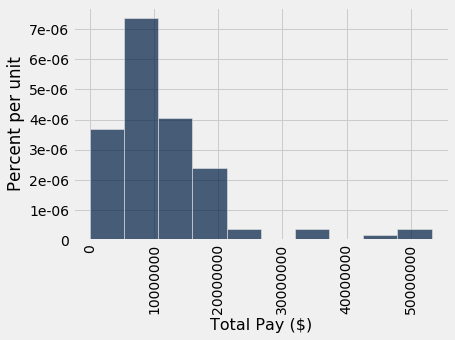

In [78]:
compensation.hist("Total Pay ($)")

**Question 4.2.** Looking at the histogram, how many CEOs made more than $30 million in total pay? Answer the question with code.  

*Hint:* Use the table method `where` and the property `num_rows`.

In [96]:
num_ceos_more_than_30_million_2 = compensation.where("Total Pay ($)", are.above_or_equal_to(30000000)).num_rows

num_ceos_more_than_30_million_2

5

In [97]:
_ = ok.grade('q4_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Great job! You're finished with lab 4! Be sure to...

* **run all the tests** (the next cell has a shortcut for that),
* **Save and Checkpoint** from the File menu,
* **run the last cell to submit your work**,
* and **ask one of the staff members to check you off**.

In [98]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------

In [ ]:
_ = ok.submit()